# CONTEXT AND RELEVANCE

In [1]:
# import library
import pandas as pd

# Relative path to read the CSV file from the "raw-data" folder
df = pd.read_csv(r"raw-data/googleplaystore.csv")

# DATA QUALITY

In [2]:
# Check for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [3]:
df.duplicated().sum()

np.int64(483)

# DATA STRUCTURE AND TYPES

In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.dtypes.value_counts()

object     12
float64     1
Name: count, dtype: int64

# OUTLIERS

In [7]:
def find_extremes(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    return min_value, max_value

In [8]:
# Example usage
min_val, max_val = find_extremes(df, 'Rating')
print(f"Minimum: {min_val}, Maximum: {max_val}")

Minimum: 1.0, Maximum: 19.0


In [9]:
# Find the 5 smallest values
smallest_values = df['Rating'].nsmallest(5)
print("Smallest values:\n", smallest_values)

# Find the 5 largest values
largest_values = df['Rating'].nlargest(5)
print("Largest values:\n", largest_values)

Smallest values:
 625     1.0
4127    1.0
5151    1.0
5978    1.0
6319    1.0
Name: Rating, dtype: float64
Largest values:
 10472    19.0
329       5.0
612       5.0
615       5.0
633       5.0
Name: Rating, dtype: float64


# DATA DISTRIBUTIONS AND SUMMARY STATISTICS

In [10]:
import pandas as pd

def calculate_statistics(df, column):
    """
    Returns the mean, median, and mode for a specified column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate statistics for.

    Returns:
        dict: A dictionary containing the mean, median, and mode of the column.
    """
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None

    return {
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value
    }

In [11]:
# Example usage
stats = calculate_statistics(df, 'Rating')
print(stats)

{'mean': np.float64(4.193338315362443), 'median': np.float64(4.3), 'mode': np.float64(4.4)}


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_seaborn(df, column, bins=10):
    """
    Creates a histogram for a specified column using seaborn.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to create a histogram for.
        bins (int): The number of bins in the histogram (default is 10).
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


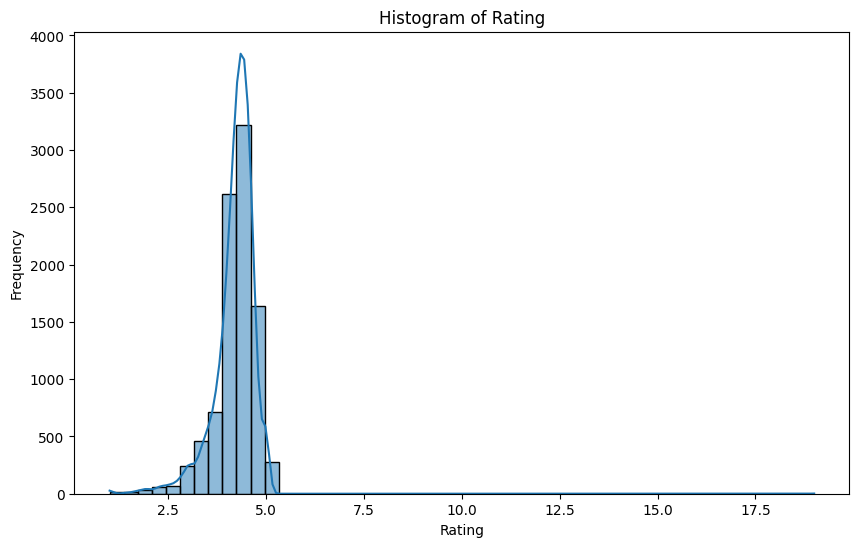

In [13]:
# Example usage
plot_histogram_seaborn(df, 'Rating', bins=50)

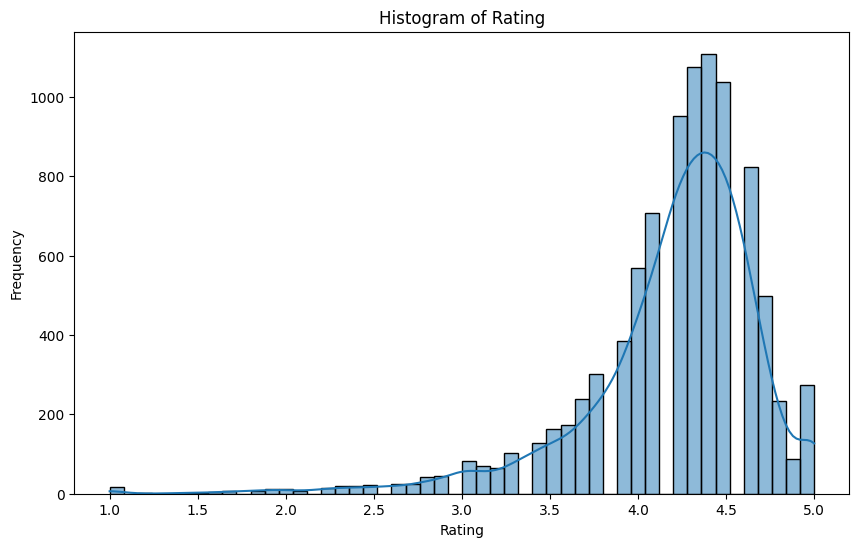

In [14]:
# Example usage
plot_histogram_seaborn(df[df.Rating != 19], 'Rating', bins=50)
